In [1]:
import numpy as np
import scipy as sc
from scipy.stats import invgamma,invwishart, norm
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generate data from the normal distribution
data = np.random.normal(loc=2, scale=5,size=1000)
# Define the conditional posteriors for mean and variance
# The mean distribution follows the noraml distribution conditional on the data and the variance
normal_dist = lambda data, var: np.random.normal(loc = np.mean(data), scale = var/len(data))
# The variance distribution is the inverse gamma distribution conditional on the data and the mean 
# Note in scipy.stats scale parameter is equivalent to beta in the wikipedia convention
inverse_gamma = lambda data,mu: invgamma.rvs(a=len(data)/2,scale=sum((data-mu)**2)/2) 

In [3]:
# Lists to hold the sampled values
mu_list = list()
std_list = list()
# Starting point for the mean
mu = 0
# How many iterations to sample
number_of_iterations = 2000
# Iteratively sample
for ii in range(0,number_of_iterations):
    # Sample the variance conditional on the previous mean and data
    var = inverse_gamma(data,mu)
    # Sample the mean conditional on the previous mean and data
    mu = normal_dist(data,var)
    # Record the values
    mu_list.append(mu)
    std_list.append(math.sqrt(var))

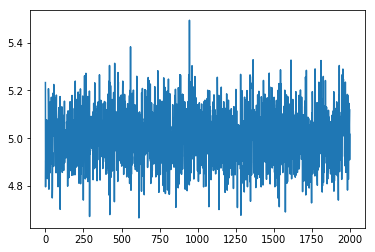

In [7]:
plt.plot(std_list)

In [4]:
print(f'Emperical mean: {round(np.mean(data),3)}, estimate from the Gibbs sampler: {round(mu_list[-1],3)}')
print(f'Emperical std: {round(np.std(data),3)}, estimate from the Gibbs sampler: {round(std_list[-1],3)}')

Emperical mean: 1.884, estimate from the Gibbs sampler: 1.878
Emperical std: 4.999, estimate from the Gibbs sampler: 5.016


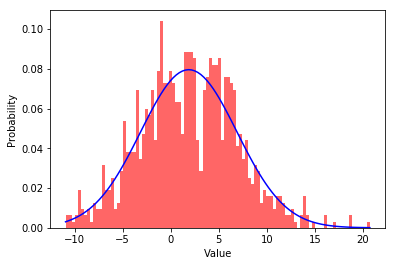

In [5]:
#How does the data and estimated parameters look like?
xx = np.linspace(min(data),max(data),100)
yy = norm.pdf(xx, loc=mu_list[-1], scale=std_list[-1])
plt.hist(data,color='r',bins=100, density=True, alpha = 0.6)
plt.plot(xx, yy, color = 'b')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

In [31]:
data2d = np.random.multivariate_normal(mean = np.array([1,3]), cov = np.array([[2,0.9],[0.9,10]]),size = 10000)

In [32]:
mult_normal_dist = lambda data2d, cov: np.random.multivariate_normal(mean = (np.mean(data2d, axis=0)), cov =cov/np.size(data2d,0))
inv_wishart_dist = lambda data2d, mean: invwishart.rvs(df = np.size(data2d,0), scale = np.matmul(np.transpose((data2d - mean)),(data2d - mean)))

In [36]:

# Starting point for the mean
mean = np.array([-1,1])
# How many iterations to sample
number_of_iterations = 1000
mean_1 = list()
mean_2 = list()
std_1 = list()
std_2 = list()
cov_l = list()
# Iteratively sample
for ii in range(0,number_of_iterations):
    # Sample the variance conditional on the previous mean and data
    cov = inv_wishart_dist(data2d, mean)
    std_1.append(cov[0,0])
    std_2.append(cov[1,1])
    cov_l.append(cov[1,0])
    # Sample the mean conditional on the previous mean and data
    mean = mult_normal_dist(data2d,cov)
    mean_1.append(mean[0])
    mean_2.append(mean[1])

In [37]:
print('True mean: ', np.mean(data2d,0), 'Estimated mean:', mean)
print('True cov: \n', np.cov(data2d.T), '\nEstimated cov:\n', cov)

True mean:  [1.01715254 3.01324751] Estimated mean: [1.02658229 3.03629929]
True cov: 
 [[1.99346242 0.77787391]
 [0.77787391 9.71277912]] 
Estimated cov:
 [[1.92976107 0.72195907]
 [0.72195907 9.59886251]]


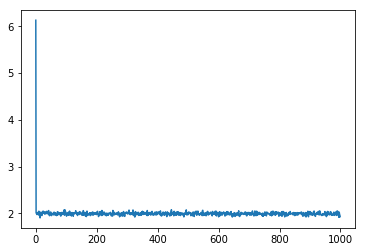

In [38]:
plt.plot(std_1)

In [21]:
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T
rv = multivariate_normal(mean, cov)

plt.contour(X,Y,rv.pdf(pos).reshape(500,500))

plt.plot(data2d[:,0],data2d[:,1], '*')



NameError: name 'multivariate_normal' is not defined

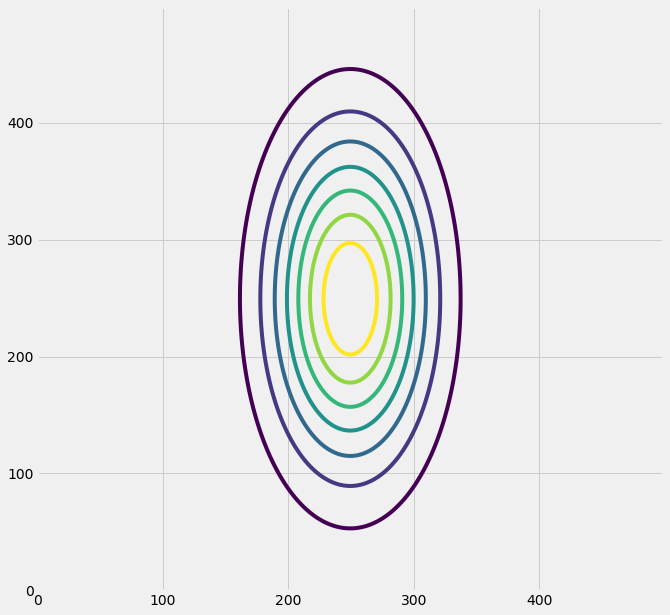

In [215]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal


#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X,Y = np.meshgrid(x,y)

pos = np.array([X.flatten(),Y.flatten()]).T



rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(rv.pdf(pos).reshape(500,500))



plt.show()